In [11]:
from utils import *

import pandas as pd
import numpy as np

In [12]:
df5 = pd.read_pickle("./pickles_temp/V4_3.pkl")
missing_values_summary(df5)

,Valores Nulos,% de Valores Nulos
id,0,0.0
amount_tsh,0,0.0
funder,0,0.0
gps_height,0,0.0
installer,0,0.0
longitude,0,0.0
latitude,0,0.0
wpt_name,0,0.0
num_private,0,0.0
basin,0,0.0


-------------- SCHEME_MANAGEMENT ---------------
count     55522
unique       11
top         VWC
freq      36793
Name: scheme_management, dtype: object
NaN:    3878
none:   0
ceros:  0
-------------- Head y Tail ---------------
scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64
scheme_management
Private operator    1063
Company             1061
Other                766
SWC                   97
Trust                 72
Name: count, dtype: int64


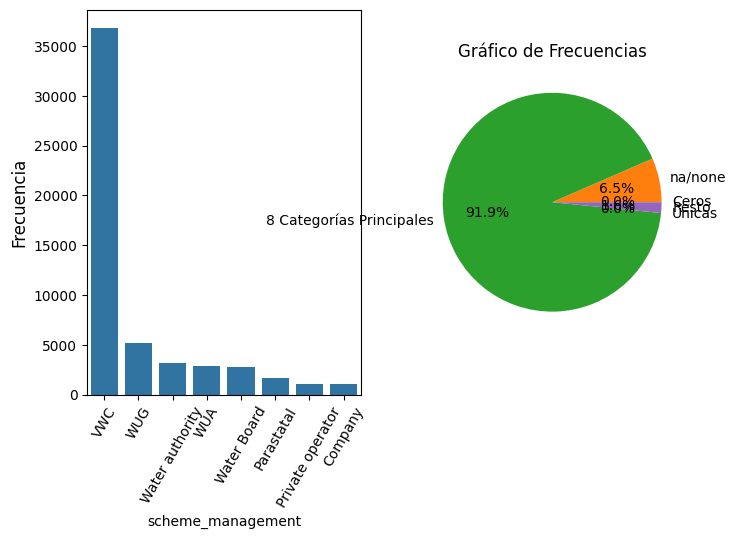

---------------------------------------------


In [13]:
descripcion_categorica(df5, 'scheme_management')

-------------- SCHEME_MANAGEMENT ---------------
count     59400
unique       11
top         VWC
freq      36793
Name: scheme_management, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
scheme_management
VWC                 36793
WUG                  5206
Other                4644
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
SWC                    97
Trust                  72
Name: count, dtype: int64
scheme_management
Parastatal          1680
Private operator    1063
Company             1061
SWC                   97
Trust                 72
Name: count, dtype: int64


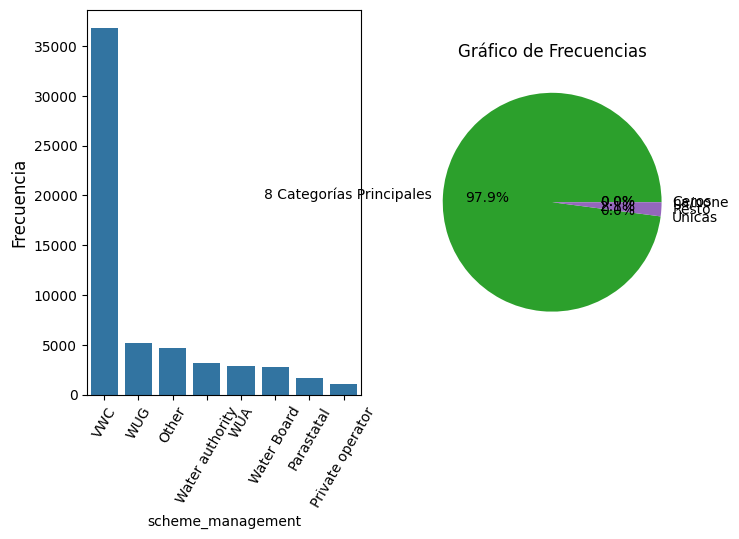

---------------------------------------------


In [14]:
#SCHEME_MANAGEMENT imputo los missings a la categoria preexistente 'other'
df5['scheme_management'] = df5['scheme_management'].replace(np.nan, 'Other')
descripcion_categorica(df5, 'scheme_management')
# Quizá fuera mejor distribuirlos aleatoriamente. Ya probaremos más adelante si me sobra tiempo

-------------- PERMIT ---------------
count     56344
unique        2
top        True
freq      38852
Name: permit, dtype: object
NaN:    3056
none:   0
ceros:  0
-------------- Head y Tail ---------------
permit
True     38852
False    17492
Name: count, dtype: int64
permit
True     38852
False    17492
Name: count, dtype: int64


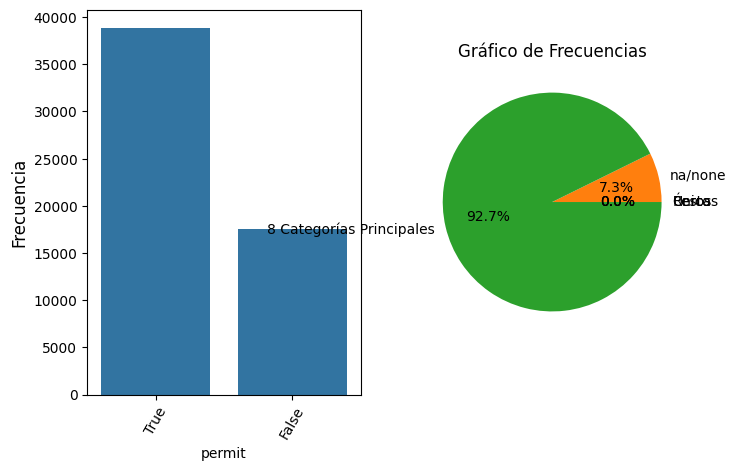

---------------------------------------------


In [15]:
descripcion_categorica(df5, 'permit')

In [16]:
# por curiosidad, veo qué relación guarda con las otras categóricas. 

from scipy.stats import chi2_contingency

def cramers_v(var1, var2):
    # Convertir las variables a tipo de datos de categoría si no lo son
    if not pd.api.types.is_categorical_dtype(var1):
        var1 = var1.astype('category')
    if not pd.api.types.is_categorical_dtype(var2):
        var2 = var2.astype('category')
    
    # Crear la tabla de contingencia
    contingency_table = pd.crosstab(var1, var2)
    
    # Calcular el coeficiente de contingencia de Cramer
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramers_v = np.sqrt(phi2 / min((k-1), (r-1)))
    
    return cramers_v
def v_cramer_dos_col(df, col, target):
    df_filtered = df.loc[(df[col] != np.nan)]
    correlation_col = cramers_v(df_filtered[col], df_filtered[target])
    return (correlation_col)
lista_de_columnas = df5.columns.tolist()
for columna in lista_de_columnas:
    if df5[columna].dtype == 'object':
        print("vCramer con -public_meeting-", columna, round(v_cramer_dos_col(df5, columna, 'permit'), 2))

vCramer con -public_meeting- funder 0.63
vCramer con -public_meeting- installer 0.66
vCramer con -public_meeting- wpt_name 0.87
vCramer con -public_meeting- basin 0.2
vCramer con -public_meeting- subvillage 0.84
vCramer con -public_meeting- region 0.41
vCramer con -public_meeting- lga 0.82
vCramer con -public_meeting- ward 0.89
vCramer con -public_meeting- public_meeting 0.13
vCramer con -public_meeting- scheme_management 0.31
vCramer con -public_meeting- permit 1.0
vCramer con -public_meeting- extraction_type_class 0.17
vCramer con -public_meeting- management_group 0.04
vCramer con -public_meeting- payment_type 0.16
vCramer con -public_meeting- quality_group 0.12
vCramer con -public_meeting- quantity 0.05
vCramer con -public_meeting- source_type 0.22
vCramer con -public_meeting- source_class 0.11
vCramer con -public_meeting- waterpoint_type 0.16
vCramer con -public_meeting- status_group 0.03


In [17]:
# investigo en internet si hay alguna funcion que obtenga un heatmap para categóricas y numéricas:

""" 
https://github.com/shakedzy/dython/issues/2
The association between Month and Day is computed using Cramer's V (This could be replaced with Theil's U by adding theil_u=True to the parameters of nominal.associations)
The association between Month and Temperature is computed using Correlation Ratio (same for Day and WorkingHours)
The association between Temperature and WorkingHours is computed using Pearson's R (correlation) """

""" from dython import nominal
columnas_categoricas = df5.select_dtypes(include=['object']).columns.tolist()
nominal.associations(df5)#, nominal_columns=columnas_categoricas)
# ---- MemoryError: Unable to allocate 6.00 GiB for an array with shape (19658, 40962) and data type int64 ----"""
# Muy interesante pero no tengo memoria suficiente. Quizá la use más tarde para un número más reducido de datos.

" from dython import nominal\ncolumnas_categoricas = df5.select_dtypes(include=['object']).columns.tolist()\nnominal.associations(df5)#, nominal_columns=columnas_categoricas)\n# ---- MemoryError: Unable to allocate 6.00 GiB for an array with shape (19658, 40962) and data type int64 ----"

-------------- PERMIT ---------------
count     59400
unique        2
top        True
freq      40971
Name: permit, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
permit
True     40971
False    18429
Name: count, dtype: int64
permit
True     40971
False    18429
Name: count, dtype: int64


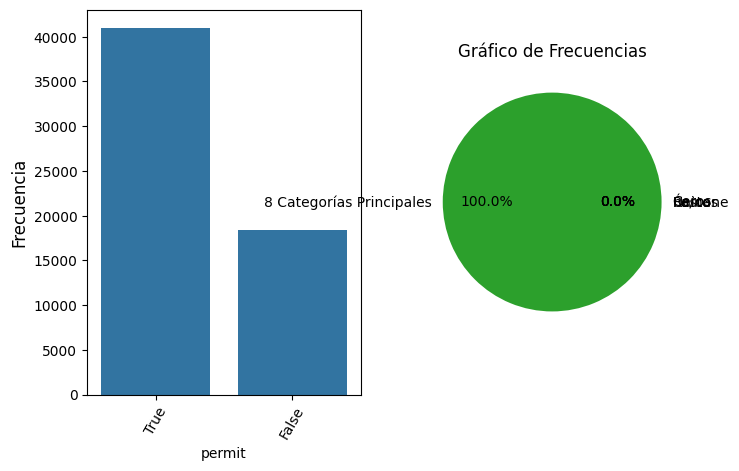

---------------------------------------------


In [18]:
# Volviendo a lo de antes, estoy ante una situacióm como la V4.3 Imputo de forma aleatoria. 
df5_permit = df5.copy()
imputer_aleatorio = fe_imp.RandomSampleImputer()
df5_permit['permit'] = imputer_aleatorio.fit_transform(df5_permit[['permit']])

descripcion_categorica(df5_permit, 'permit')


In [20]:
missing_values_summary(df5_permit)

,Valores Nulos,% de Valores Nulos
id,0,0.0
amount_tsh,0,0.0
funder,0,0.0
gps_height,0,0.0
installer,0,0.0
longitude,0,0.0
latitude,0,0.0
wpt_name,0,0.0
num_private,0,0.0
basin,0,0.0


In [21]:
# Vamos a imputar source_class
df6 = df5_permit.copy()

-------------- SOURCE_CLASS ---------------
count           59122
unique              2
top       groundwater
freq            45794
Name: source_class, dtype: object
NaN:    278
none:   0
ceros:  0
-------------- Head y Tail ---------------
source_class
groundwater    45794
surface        13328
Name: count, dtype: int64
source_class
groundwater    45794
surface        13328
Name: count, dtype: int64


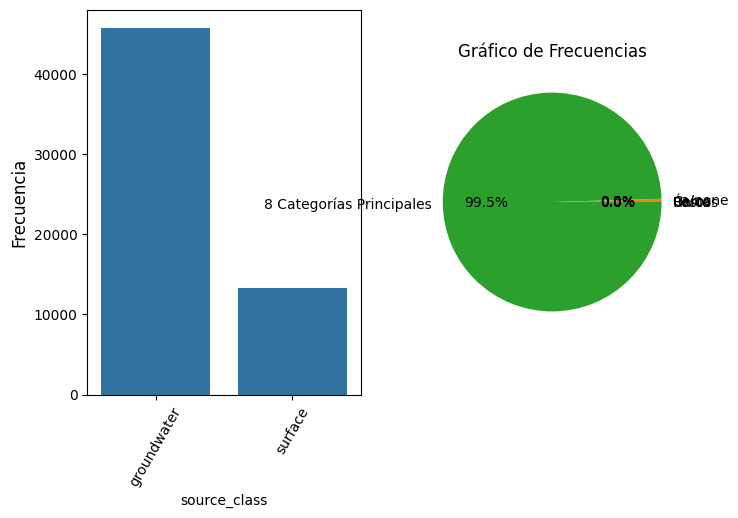

---------------------------------------------


In [22]:
descripcion_categorica(df6, 'source_class')
# Son muy pocas, imputo aleatoriamente

-------------- SOURCE_CLASS ---------------
count           59400
unique              2
top       groundwater
freq            46003
Name: source_class, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
source_class
groundwater    46003
surface        13397
Name: count, dtype: int64
source_class
groundwater    46003
surface        13397
Name: count, dtype: int64


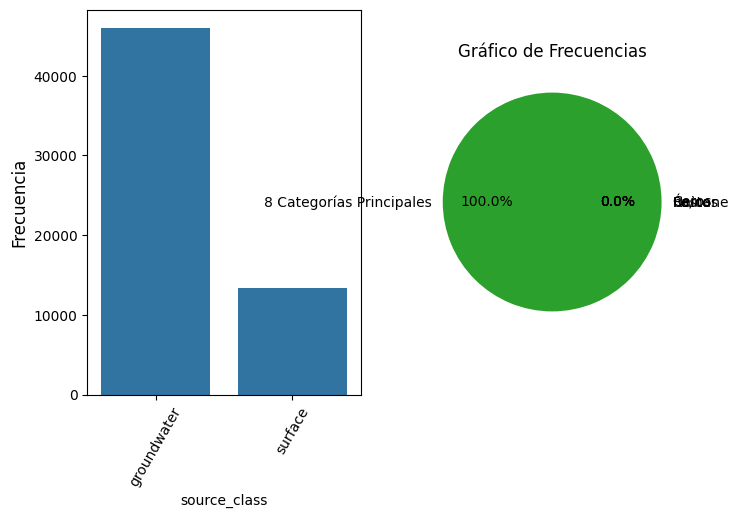

---------------------------------------------


In [24]:
imputer_aleatorio = fe_imp.RandomSampleImputer()
df6['source_class'] = imputer_aleatorio.fit_transform(df6[['source_class']])
descripcion_categorica(df6, 'source_class')


In [ ]:
# veo descripcion_categorica(df6, 'source_class')


-------------- QUANTITY ---------------
count      58611
unique         4
top       enough
freq       33186
Name: quantity, dtype: object
NaN:    789
none:   0
ceros:  0
-------------- Head y Tail ---------------
quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
Name: count, dtype: int64
quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
Name: count, dtype: int64


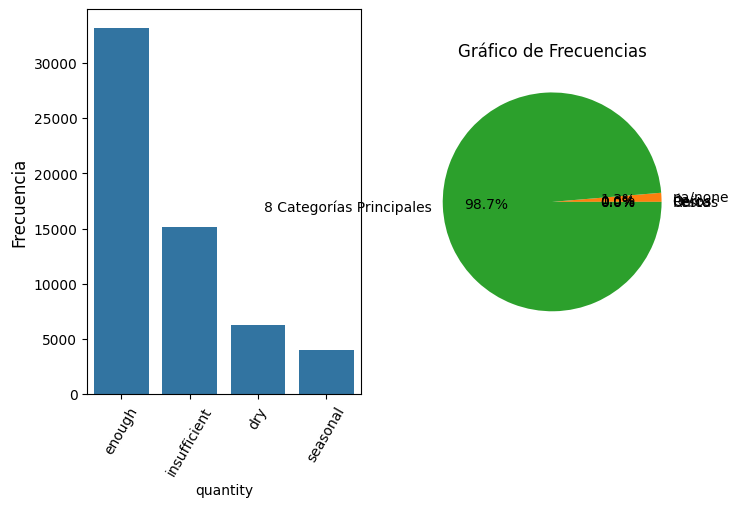

---------------------------------------------


In [26]:
descripcion_categorica(df6, 'quantity')
# Son tan pocas que no me voy a complicar. Imputación aleatoria

-------------- QUANTITY ---------------
count      59400
unique         4
top       enough
freq       33632
Name: quantity, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
quantity
enough          33632
insufficient    15350
dry              6319
seasonal         4099
Name: count, dtype: int64
quantity
enough          33632
insufficient    15350
dry              6319
seasonal         4099
Name: count, dtype: int64


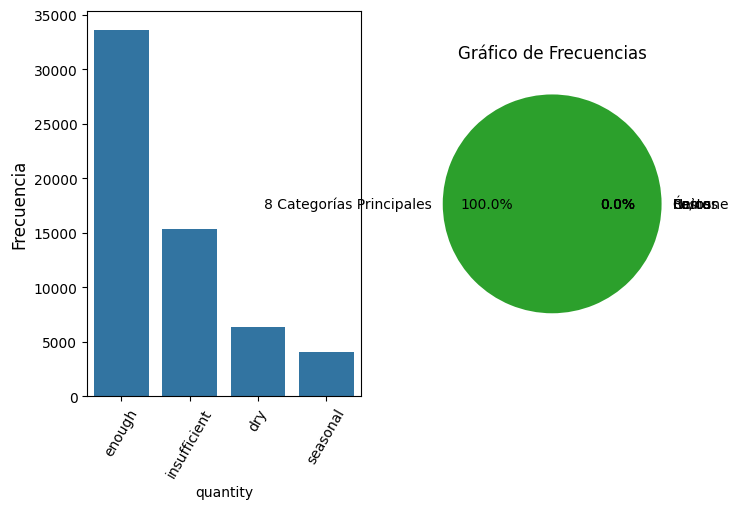

---------------------------------------------


In [28]:
imputer_aleatorio = fe_imp.RandomSampleImputer()
df6['quantity'] = imputer_aleatorio.fit_transform(df6[['quantity']]) 
descripcion_categorica(df6, 'quantity')

In [29]:
missing_values_summary(df6)

,Valores Nulos,% de Valores Nulos
id,0,0.0
amount_tsh,0,0.0
funder,0,0.0
gps_height,0,0.0
installer,0,0.0
longitude,0,0.0
latitude,0,0.0
wpt_name,0,0.0
num_private,0,0.0
basin,0,0.0


In [ ]:
# En el siguiente notebook imputaré el año de construcción
df6.to_pickle("./pickles_temp/V4_4.pkl")
